# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [5]:
tab['Saudáveis'] = tab[0]/tab['All']
tab

flag_doente,0,1,All,Saudáveis
sex,,,,
0.0,72,25,97,0.742268
1.0,92,114,206,0.446602
All,164,139,303,0.541254


In [6]:
tab['Doentes'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,Saudáveis,Doentes
sex,,,,,
0.0,72,25,97,0.742268,0.257732
1.0,92,114,206,0.446602,0.553398
All,164,139,303,0.541254,0.458746


In [7]:
Média_Doentes = df.groupby('sex')['flag_doente'].mean()
Média_Doentes

sex
0.0    0.257732
1.0    0.553398
Name: flag_doente, dtype: float64

In [8]:
Soma_doentes = df.groupby('sex')['flag_doente'].sum()
Soma_doentes

sex
0.0     25
1.0    114
Name: flag_doente, dtype: int64

In [9]:
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,Saudáveis,Doentes,chance
sex,,,,,,
0.0,72,25,97,0.742268,0.257732,0.347222
1.0,92,114,206,0.446602,0.553398,1.239130
All,164,139,303,0.541254,0.458746,0.847561


In [10]:
tab['RC_vs_All'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All
sex,,,,,,,
0.0,72,25,97,0.742268,0.257732,0.347222,0.409672
1.0,92,114,206,0.446602,0.553398,1.239130,1.461996
All,164,139,303,0.541254,0.458746,0.847561,1.000000


In [11]:
tab['Logito'] = np.log(tab['chance'])
tab

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito
sex,,,,,,,,
0.0,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392


In [12]:
tab['WOE'] = np.log(tab['RC_vs_All'])
tab

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito,WOE
sex,,,,,,,,,
0.0,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [13]:
lista_age = df.age.unique()
lista_age.sort()
lista_age

array([29., 34., 35., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 74.,
       76., 77.])

In [14]:
df['age_grupos']=pd.cut(

   df['age'],

   bins=[29, 40, 50, 60, 70,  sys.maxsize],

   labels=['0', '1', '2', '3', '4']

)

In [30]:
df['age_grupos']

0      3
1      3
2      3
3      0
4      1
      ..
298    1
299    3
300    2
301    2
302    0
Name: age_grupos, Length: 303, dtype: category
Categories (5, object): ['0' < '1' < '2' < '3' < '4']

In [15]:
tab_age = pd.crosstab(df['age_grupos'], df['flag_doente'], margins= True)
tab_age

flag_doente,0,1,All
age_grupos,,,
0,11,6,17
1,53,23,76
2,64,66,130
3,30,43,73
4,5,1,6
All,163,139,302


In [16]:
tab_age['Saudáveis'] = tab_age[0]/tab_age['All']
tab_age

flag_doente,0,1,All,Saudáveis
age_grupos,,,,
0,11,6,17,0.647059
1,53,23,76,0.697368
2,64,66,130,0.492308
3,30,43,73,0.410959
4,5,1,6,0.833333
All,163,139,302,0.539735


In [17]:
tab_age['Doentes'] = tab_age[1]/tab_age['All']
tab_age

flag_doente,0,1,All,Saudáveis,Doentes
age_grupos,,,,,
0,11,6,17,0.647059,0.352941
1,53,23,76,0.697368,0.302632
2,64,66,130,0.492308,0.507692
3,30,43,73,0.410959,0.589041
4,5,1,6,0.833333,0.166667
All,163,139,302,0.539735,0.460265


In [18]:
tab_age['chance'] = tab_age[1]/tab_age[0]
tab_age

flag_doente,0,1,All,Saudáveis,Doentes,chance
age_grupos,,,,,,
0,11,6,17,0.647059,0.352941,0.545455
1,53,23,76,0.697368,0.302632,0.433962
2,64,66,130,0.492308,0.507692,1.031250
3,30,43,73,0.410959,0.589041,1.433333
4,5,1,6,0.833333,0.166667,0.200000
All,163,139,302,0.539735,0.460265,0.852761


In [19]:
tab_age['RC_vs_All'] = tab_age['chance']/tab_age.loc['All','chance']
tab_age

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All
age_grupos,,,,,,,
0,11,6,17,0.647059,0.352941,0.545455,0.639634
1,53,23,76,0.697368,0.302632,0.433962,0.508891
2,64,66,130,0.492308,0.507692,1.031250,1.209308
3,30,43,73,0.410959,0.589041,1.433333,1.680815
4,5,1,6,0.833333,0.166667,0.200000,0.234532
All,163,139,302,0.539735,0.460265,0.852761,1.000000


In [20]:
tab_age['Logito'] = np.log(tab_age['chance'])
tab_age

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito
age_grupos,,,,,,,,
0,11,6,17,0.647059,0.352941,0.545455,0.639634,-0.606136
1,53,23,76,0.697368,0.302632,0.433962,0.508891,-0.834798
2,64,66,130,0.492308,0.507692,1.031250,1.209308,0.030772
3,30,43,73,0.410959,0.589041,1.433333,1.680815,0.360003
4,5,1,6,0.833333,0.166667,0.200000,0.234532,-1.609438
All,163,139,302,0.539735,0.460265,0.852761,1.000000,-0.159276


In [21]:
tab_age['WOE'] = np.log(tab_age['RC_vs_All'])
tab_age

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito,WOE
age_grupos,,,,,,,,,
0,11,6,17,0.647059,0.352941,0.545455,0.639634,-0.606136,-0.446860
1,53,23,76,0.697368,0.302632,0.433962,0.508891,-0.834798,-0.675521
2,64,66,130,0.492308,0.507692,1.031250,1.209308,0.030772,0.190048
3,30,43,73,0.410959,0.589041,1.433333,1.680815,0.360003,0.519279
4,5,1,6,0.833333,0.166667,0.200000,0.234532,-1.609438,-1.450162
All,163,139,302,0.539735,0.460265,0.852761,1.000000,-0.159276,0.000000


In [38]:
tab_age['age_categorias'] = [0,1,2,3,4,'All']

In [39]:
tab_age.head()

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito,WOE,age_grupos,age_categorias
age_grupos,,,,,,,,,,,
0,11,6,17,0.647059,0.352941,0.545455,0.639634,-0.606136,-0.446860,0,0
1,53,23,76,0.697368,0.302632,0.433962,0.508891,-0.834798,-0.675521,1,1
2,64,66,130,0.492308,0.507692,1.031250,1.209308,0.030772,0.190048,2,2
3,30,43,73,0.410959,0.589041,1.433333,1.680815,0.360003,0.519279,3,3
4,5,1,6,0.833333,0.166667,0.200000,0.234532,-1.609438,-1.450162,4,4


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

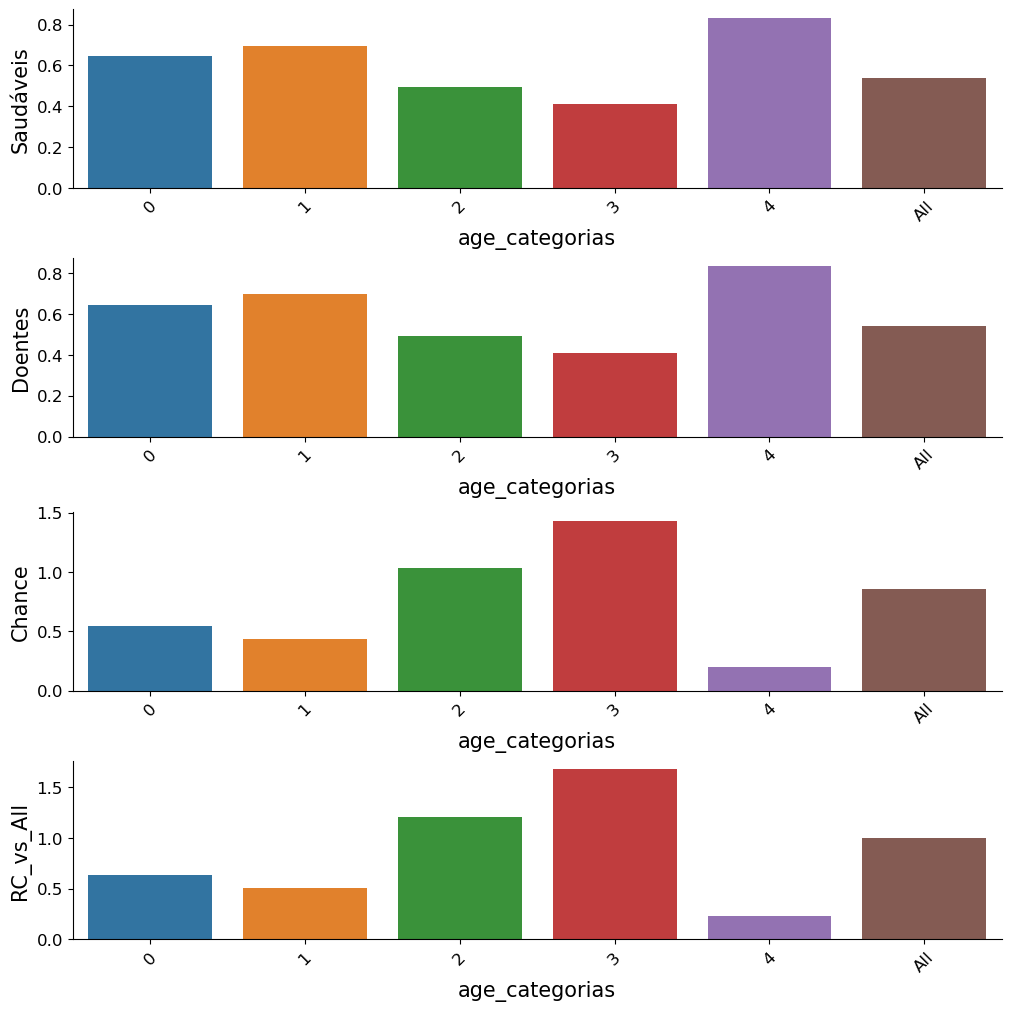

In [59]:
fig, ax = plt.subplots(4,1,figsize=(10,10), constrained_layout=True)

sns.barplot(x='age_categorias',y='Saudáveis',data=tab_age, ax=ax[0])
ax[0].tick_params(axis='x', rotation=45, labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylabel( "Saudáveis" , size = 15 )
ax[0].set_xlabel( "age_categorias" , size = 15 )

sns.barplot(x='age_categorias',y='Saudáveis',data=tab_age, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45, labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylabel( "Doentes" , size = 15 )
ax[1].set_xlabel( "age_categorias" , size = 15 )

sns.barplot(x='age_categorias',y='chance',data=tab_age, ax=ax[2])
ax[2].tick_params(axis='x', rotation=45, labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].set_ylabel( "Chance" , size = 15 )
ax[2].set_xlabel( "age_categorias" , size = 15 )

sns.barplot(x='age_categorias',y='RC_vs_All',data=tab_age, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45, labelsize=12)
ax[3].tick_params(axis='y', labelsize=12)
ax[3].set_ylabel( "RC_vs_All" , size = 15 )
ax[3].set_xlabel( "age_categorias" , size = 15 )
sns.despine()
plt.show()

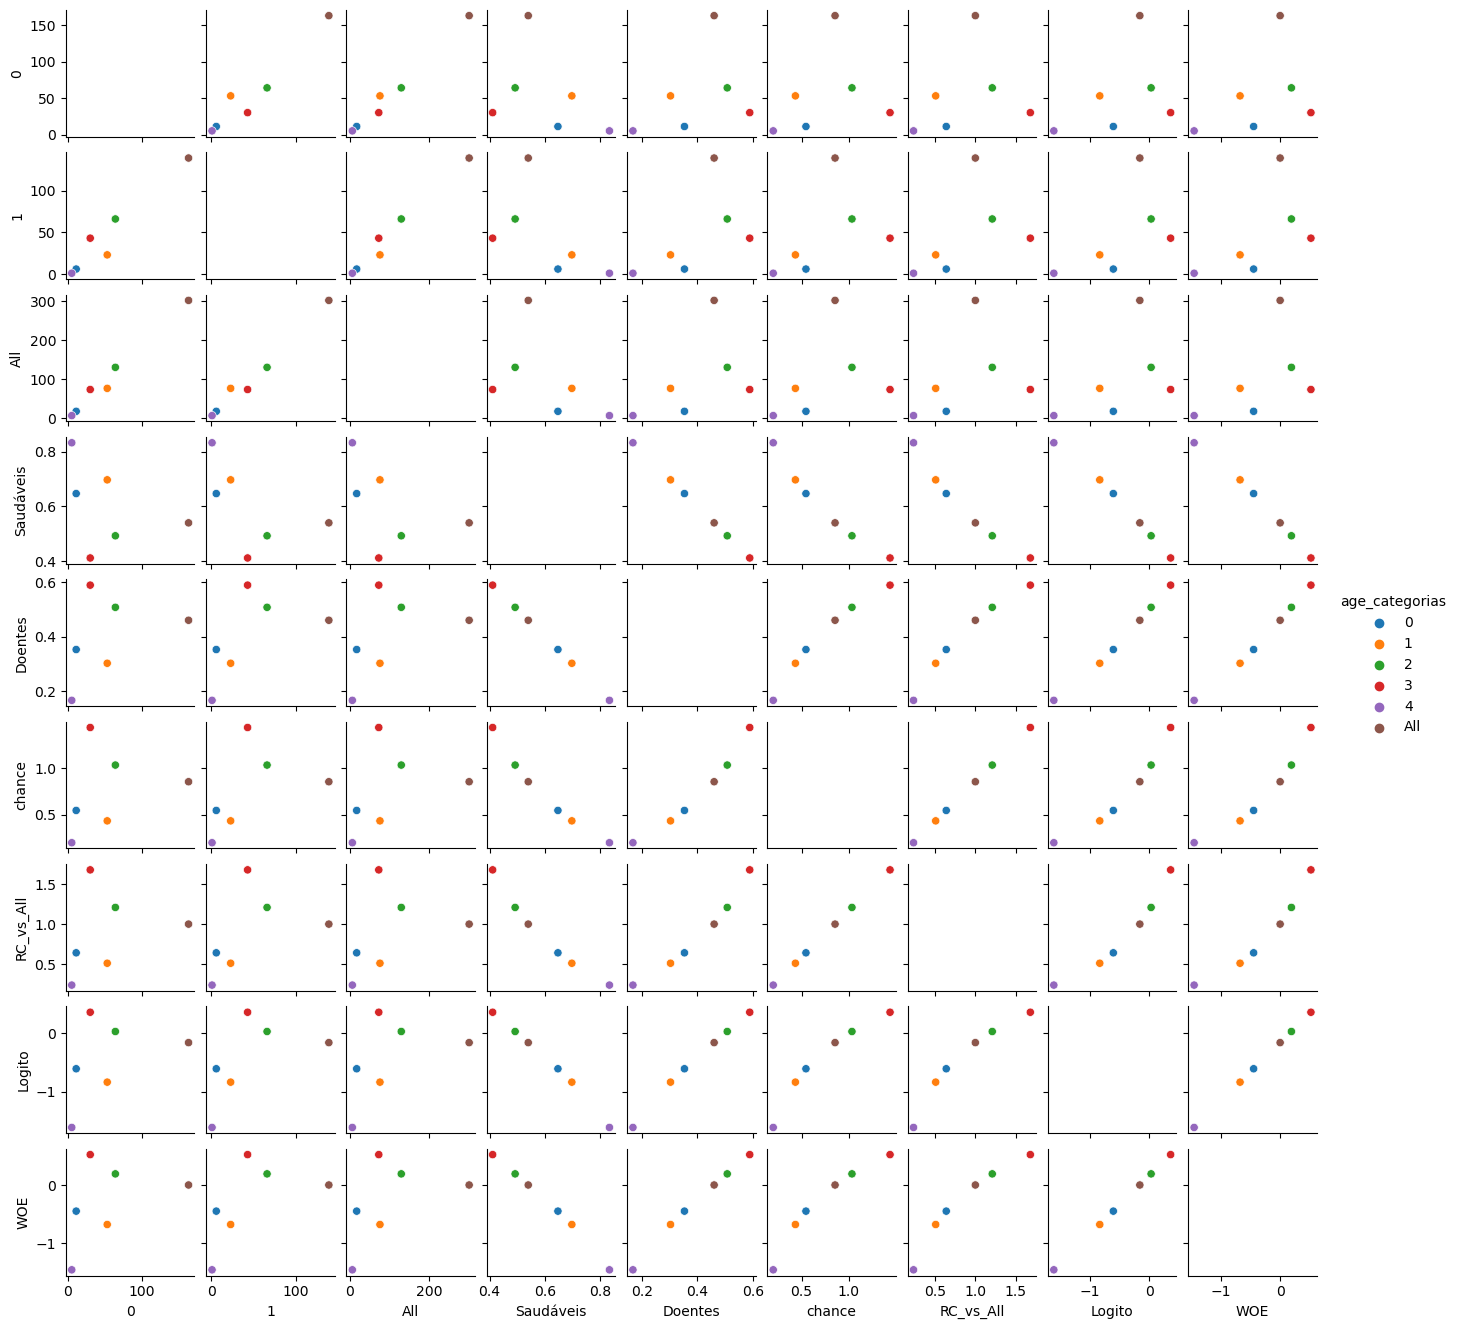

In [47]:
sns.pairplot(
    tab_age,
    hue='age_categorias',
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=1.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
plt.show()